**Problem tanımı ve amaç**: Bu veri seti UK’de 2000-2016 yıllarına ait 1.6 milyondan fazla trafik kazası verilerini içermektedir. Bu veri seti aracılığıyla aşağıdaki gibi sorulara yanıt aranmaktadır.

-Trafik akışının değişmesi kazaları nasıl etkiler?
-Kaza oranlarını ne artırır?
-Zaman içinde kaza oranlarını tahmin edebilir miyiz?
-Kırsal ve kentsel alanlar nasıl farklılaştı?


# **1.Gerekli kütüphaneler**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt


# **2.Verileri okuma ve birleştirme(concat)**

In [35]:
data1 = pd.read_csv('./accidents_2005_to_2007.csv')
data2 = pd.read_csv('./accidents_2009_to_2011.csv')
data3 = pd.read_csv('./accidents_2012_to_2014.csv')
dataset = pd.concat([data1,data2,data3])
dataset.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [37]:
new_dataset = dataset.drop(["Accident_Index","Location_Easting_OSGR","Location_Northing_OSGR","Police_Force",
         "Number_of_Vehicles","Local_Authority_(District)","Local_Authority_(Highway)",
         "1st_Road_Class","1st_Road_Number","Junction_Detail","Junction_Control","2nd_Road_Class","2nd_Road_Number","Pedestrian_Crossing-Human_Control",
         "Pedestrian_Crossing-Physical_Facilities","Special_Conditions_at_Site","Carriageway_Hazards","Did_Police_Officer_Attend_Scene_of_Accident","LSOA_of_Accident_Location"],axis=1)
new_dataset

,Longitude,Latitude,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,-0.191170,51.489096,2,1,04/01/2005,3,17:42,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,-0.211708,51.520075,3,1,05/01/2005,4,17:36,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,-0.206458,51.525301,3,1,06/01/2005,5,00:15,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,-0.173862,51.482442,3,1,07/01/2005,6,10:35,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,-0.156618,51.495752,3,1,10/01/2005,2,21:13,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,-3.417278,55.264773,2,1,07/12/2014,1,22:20,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2,2014
464693,-3.230255,55.054855,3,2,11/12/2014,5,06:40,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2,2014
464694,-3.230826,54.985668,3,1,09/12/2014,3,02:00,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,2014
464695,-3.191397,54.990446,2,2,17/12/2014,4,06:55,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,2014


In [38]:
new_dataset.isnull().sum()

Longitude                   101
Latitude                    101
Accident_Severity             0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [39]:
dataset_without_null = new_dataset.dropna()
dataset_without_null

,Longitude,Latitude,Accident_Severity,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,-0.191170,51.489096,2,1,04/01/2005,3,17:42,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,-0.211708,51.520075,3,1,05/01/2005,4,17:36,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,-0.206458,51.525301,3,1,06/01/2005,5,00:15,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,-0.173862,51.482442,3,1,07/01/2005,6,10:35,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,-0.156618,51.495752,3,1,10/01/2005,2,21:13,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,-3.417278,55.264773,2,1,07/12/2014,1,22:20,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2,2014
464693,-3.230255,55.054855,3,2,11/12/2014,5,06:40,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2,2014
464694,-3.230826,54.985668,3,1,09/12/2014,3,02:00,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,2014
464695,-3.191397,54.990446,2,2,17/12/2014,4,06:55,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,2014


In [40]:
dataset_without_null.isnull().sum()

Longitude                  0
Latitude                   0
Accident_Severity          0
Number_of_Casualties       0
Date                       0
Day_of_Week                0
Time                       0
Road_Type                  0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

In [41]:
dataset_without_null.describe()

,Longitude,Latitude,Accident_Severity,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Year
count,1.501857e+06,1.501857e+06,1.501857e+06,1.501857e+06,1.501857e+06,1.501857e+06,1.501857e+06,1.501857e+06
mean,-1.436816e+00,5.258882e+01,2.838127e+00,1.351138e+00,4.118619e+00,3.900558e+01,1.353729e+00,2.009370e+03
std,1.398424e+00,1.450111e+00,4.019181e-01,8.256005e-01,1.924435e+00,1.414040e+01,4.781752e-01,3.013406e+00
min,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,2.005000e+03
25%,-2.374550e+00,5.148998e+01,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,1.000000e+00,2.006000e+03
50%,-1.404964e+00,5.230520e+01,3.000000e+00,1.000000e+00,4.000000e+00,3.000000e+01,1.000000e+00,2.010000e+03
75%,-2.211070e-01,5.347903e+01,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+01,2.000000e+00,2.012000e+03
max,1.759398e+00,6.075754e+01,3.000000e+00,9.300000e+01,7.000000e+00,7.000000e+01,3.000000e+00,2.014000e+03


# **Yıllara ve Günlere Göre Trafik Kaza Sayıları**

In [42]:
year = dataset_without_null["Year"].value_counts() 
year

2005    198405
2006    188897
2007    181866
2012    179436
2009    163334
2010    154185
2011    151241
2014    146100
2013    138393
Name: Year, dtype: int64

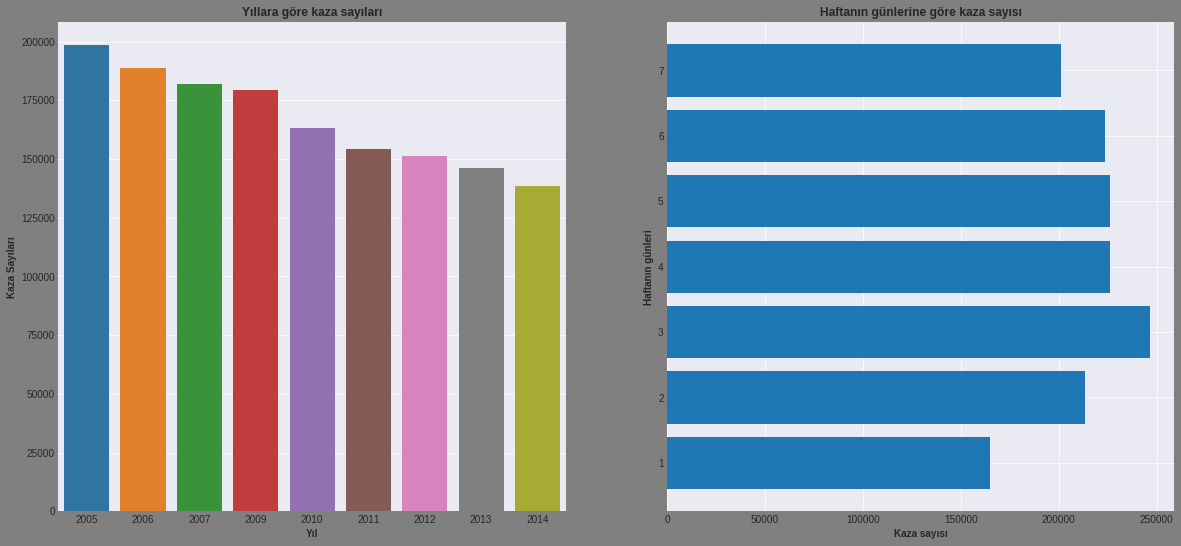

In [43]:
years = dataset_without_null["Year"].unique()
num = year.values

week = dataset_without_null["Day_of_Week"].value_counts()
week
weeks = dataset_without_null["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Kaza Sayıları",weight="bold")
plt.xlabel("Yıl",weight="bold")

plt.title("Yıllara göre kaza sayıları",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Haftanın günlerine göre kaza sayısı",weight="bold")
plt.xlabel("Kaza sayısı",weight="bold")
plt.ylabel("Haftanın günleri",weight="bold")
plt.show()

# **Hava Olayları Yolları Nasıl Etkiliyor ve En Çok Trafik Kazalarına Neden Olan Hava Koşulları Neler?**

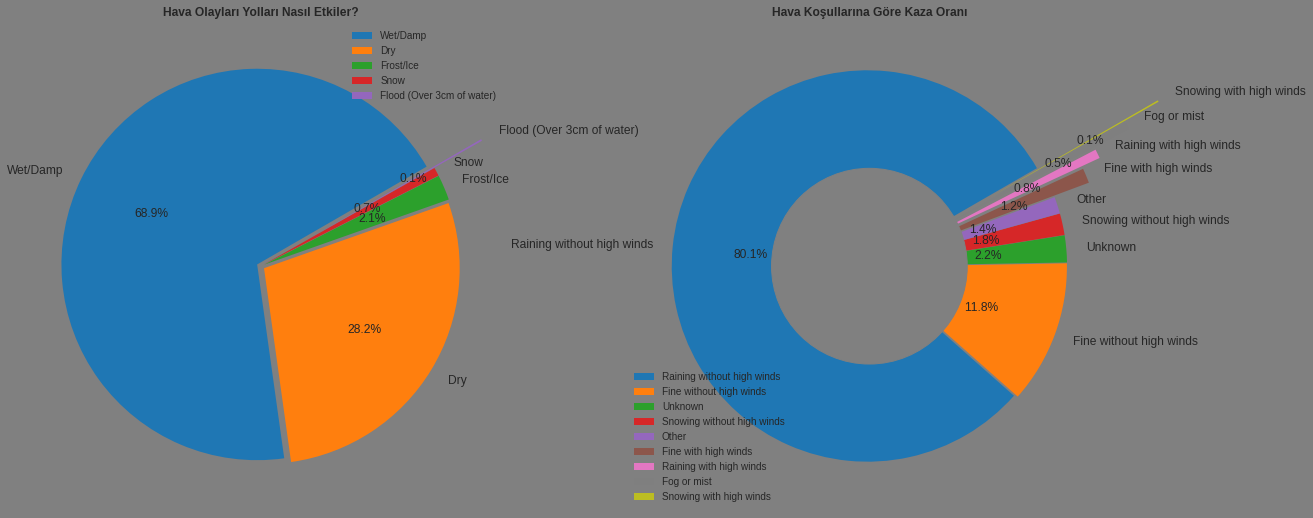

In [25]:
road_cond = dataset_without_null["Road_Surface_Conditions"].value_counts()

road_cond_arr = dataset_without_null["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

weather_cond = dataset_without_null["Weather_Conditions"].value_counts() 

weather_cond_arr = dataset_without_null["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values
plt.figure(figsize = (20,9),facecolor='grey')
plt.subplot(1, 2, 1)

plt.pie(road_num_acc_arr, labels = road_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.02,0.3),autopct="%1.1f%%")
plt.legend()
plt.title("Hava Olayları Yolları Nasıl Etkiler?",weight="bold")


plt.subplot(1, 2, 2)

plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc ="lower left")
plt.title("Hava Koşullarına Göre Kaza Oranı",weight="bold")

my_circle = plt.Circle((0,0),0.5, color ='grey')
fig = plt.gcf()
fig.gca().add_artist(my_circle)

plt.show()

# **Kentsel ve Kırsal Alan Trafik Kazaları Riskleri Arasındaki Fark Nedir?**

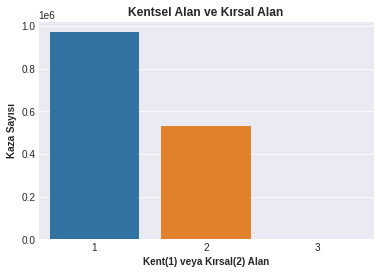

In [44]:
dataset_without_null["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=dataset_without_null)
plt.ylabel("Kaza Sayısı",weight="bold")
plt.xlabel("Kent(1) veya Kırsal(2) Alan",weight="bold")
plt.title("Kentsel Alan ve Kırsal Alan",weight="bold")

plt.show() 

# **Trafik kazalarında Kaza Şiddeti ile Yaralı Sayısı arasında nasıl bir ilişki vardır?**

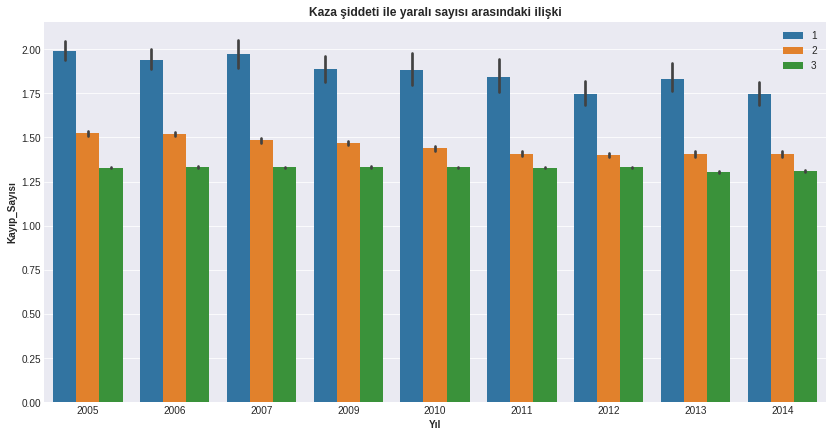

In [45]:
plt.figure(figsize = (14,7))
sns.barplot(x="Year",y="Number_of_Casualties",data=dataset_without_null,hue="Accident_Severity")
plt.title("Kaza şiddeti ile yaralı sayısı arasındaki ilişki",weight="bold")
plt.xlabel("Yıl",weight="bold")
plt.ylabel("Kayıp_Sayısı",weight="bold")
plt.legend(loc="upper right")
plt.show()

# **Yol Türüne Göre Kaza Sayıları**

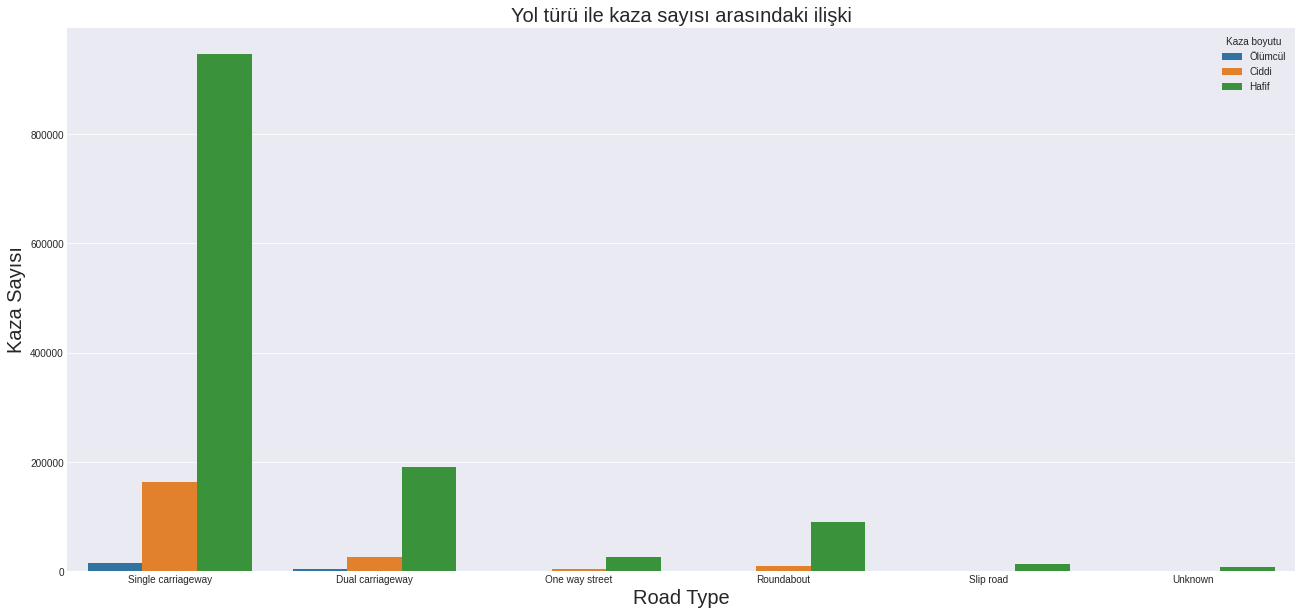

In [31]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset_without_null,x="Road_Type",hue="Accident_Severity")
plt.title("Yol türü ile kaza sayısı arasındaki ilişki",size=20)
plt.xlabel("Road Type",size=20)
plt.ylabel("Kaza Sayısı",size=20)
plt.legend(title="Kaza boyutu",labels=["Ölümcül","Ciddi","Hafif"])

# **Hız Limitine Göre Kaza Sayıları**

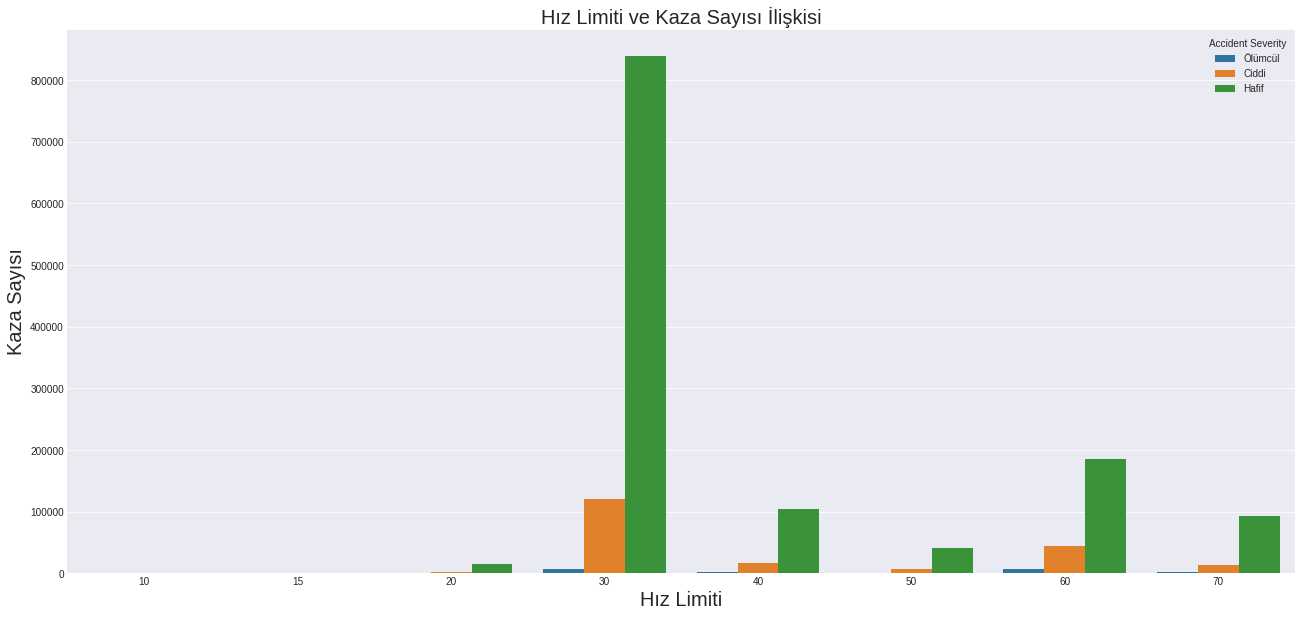

In [46]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset_without_null,x="Speed_limit",hue="Accident_Severity")
plt.title("Hız Limiti ve Kaza Sayısı İlişkisi",size=20)
plt.xlabel("Hız Limiti",size=20)
plt.ylabel("Kaza Sayısı",size=20)
plt.legend(title="Accident Severity",labels=["Ölümcül","Ciddi","Hafif"])